In [ ]:
import cv2 

img = cv2.imread('/home/likcos/DataSets/sportimages/sportimages/basket/basket2_0001.jpg')
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

# Convolutional Neural Networks

# Importar Librerías

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [3]:
dirname = os.path.join(os.getcwd(),r'D:\Escuela\Ultimooo\IA\DESASTRES')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  D:\Escuela\Ultimooo\IA\DESASTRES\
D:\Escuela\Ultimooo\IA\DESASTRES\data_asaltos 1
D:\Escuela\Ultimooo\IA\DESASTRES\data_incendios 39116
D:\Escuela\Ultimooo\IA\DESASTRES\data_inundaciones 12689
D:\Escuela\Ultimooo\IA\DESASTRES\data_RoboCasaHabitacion 20210
D:\Escuela\Ultimooo\IA\DESASTRES\data_tornado 23677
Directorios leidos: 5
Imagenes en cada directorio [39117, 12689, 20210, 23677, 26776]
suma Total de imagenes en subdirs: 122469


# Creamos las etiquetas

In [4]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  122469


In [5]:
desastres=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    desastres.append(name[len(name)-1])
    indice=indice+1

0 data_asaltos
1 data_incendios
2 data_inundaciones
3 data_RoboCasaHabitacion
4 data_tornado


In [6]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [7]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (97975, 30, 30, 3) (97975,)
Testing data shape :  (24494, 30, 30, 3) (24494,)


Text(0.5, 1.0, 'Ground Truth : 2')

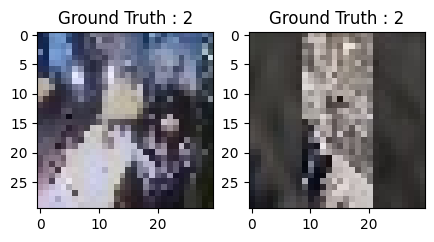

In [8]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

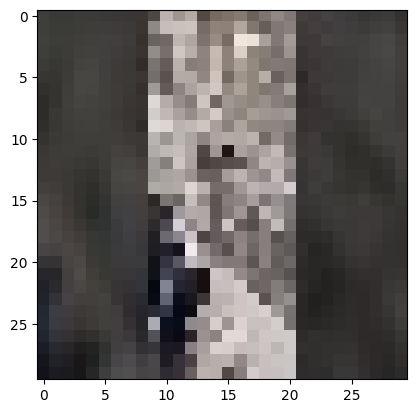

In [9]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [10]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 2
After conversion to one-hot: [0. 0. 1. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [11]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [12]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(78380, 30, 30, 3) (19595, 30, 30, 3) (78380, 5) (19595, 5)


# Creamos el modelo de CNN

In [13]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [14]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(30,30,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))


sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [15]:
sport_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       230,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,493 (904.27 KB)

 Trainable params: 231,493 (904.27 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
TF_USE_LEGACY_KERAS=True

INIT_LR = 0.01

# Create an optimizer with a learning rate schedule
optimizer = keras.optimizers.SGD(learning_rate=keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=INIT_LR,
    decay_steps=100,
    decay_rate=0.96,  # Decay rate can be adjusted
    staircase=True
))

# Compile the model
sport_model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=optimizer,
    metrics=['accuracy']
)

# Entrenamos el modelo: Aprende a clasificar imágenes

In [17]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 0.5651 - loss: 1.1197 - val_accuracy: 0.8899 - val_loss: 0.3753
Epoch 2/20
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.8386 - loss: 0.4742 - val_accuracy: 0.9388 - val_loss: 0.2432
Epoch 3/20
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.8849 - loss: 0.3627 - val_accuracy: 0.9453 - val_loss: 0.1974
Epoch 4/20
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.9002 - loss: 0.3207 - val_accuracy: 0.9555 - val_loss: 0.1765
Epoch 5/20
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.9081 - loss: 0.2972 - val_accuracy: 0.9579 - val_loss: 0.1658
Epoch 6/20
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.9108 - loss: 0.2893 - val_accuracy: 0.9596 - val_loss: 0.1583
Epoch 7/20
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.9130 - loss: 0.2797 - val_accuracy: 0.9604 - val_loss: 0.1556
Epoch 8/20
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.9151 -

In [18]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.export(r"D:\Escuela\Ultimooo\IA\DESASTRES\modelo")

INFO:tensorflow:Assets written to: D:\Escuela\Ultimooo\IA\DESASTRES\modelo\assets


INFO:tensorflow:Assets written to: D:\Escuela\Ultimooo\IA\DESASTRES\modelo\assets


Saved artifact at 'D:\Escuela\Ultimooo\IA\DESASTRES\modelo'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 30, 30, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  1741642424112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1741642423936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1741945800656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1741945801712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1741945801360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1741945800832: TensorSpec(shape=(), dtype=tf.resource, name=None)


# Evaluamos la red

In [19]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

766/766 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9649 - loss: 0.1521


In [20]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.1537037193775177
Test accuracy: 0.9632154703140259


In [21]:
sport_train.history

{'accuracy': [0.6936846375465393,
  0.8548481464385986,
  0.8896912336349487,
  0.9033682346343994,
  0.9086246490478516,
  0.912988007068634,
  0.9141490459442139,
  0.9159224033355713,
  0.9170324206352234,
  0.9173258543014526,
  0.9189716577529907,
  0.9189589023590088,
  0.9165220856666565,
  0.9178744554519653,
  0.9190482497215271,
  0.9192013144493103,
  0.9171854853630066,
  0.9177724123001099,
  0.9178106784820557,
  0.9183847904205322],
 'loss': [0.840604841709137,
  0.437542200088501,
  0.34911617636680603,
  0.3136836886405945,
  0.2957874536514282,
  0.2828689515590668,
  0.27944040298461914,
  0.27601680159568787,
  0.27422237396240234,
  0.27062538266181946,
  0.2695765495300293,
  0.26998478174209595,
  0.27215272188186646,
  0.2718605399131775,
  0.2673560380935669,
  0.26961010694503784,
  0.27051207423210144,
  0.27004286646842957,
  0.2712246775627136,
  0.27004775404930115],
 'val_accuracy': [0.8898698687553406,
  0.9388109445571899,
  0.9453431963920593,
  0.9554

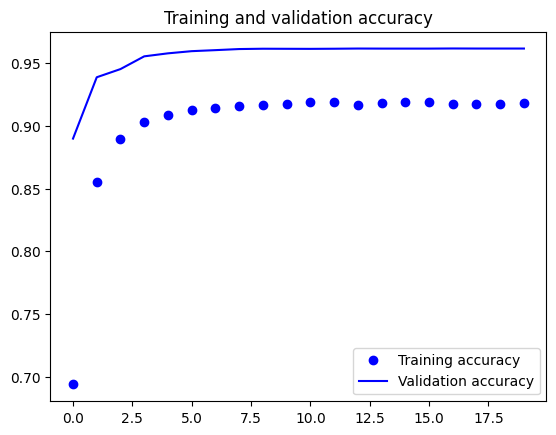

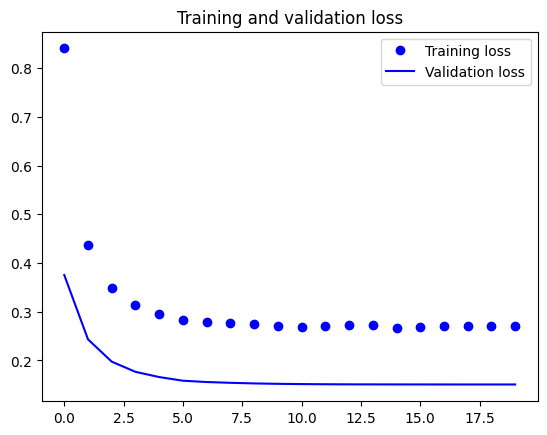

In [22]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
predicted_classes2 = sport_model.predict(test_X)

766/766 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


In [24]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [25]:
predicted_classes.shape, test_Y.shape

((24494,), (24494,))

# Aprendamos de los errores: Qué mejorar

Found 23593 correct labels


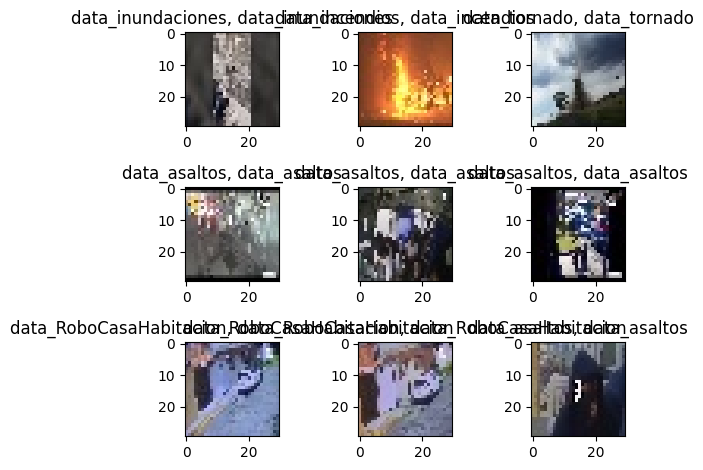

In [26]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(30,30,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(desastres[predicted_classes[correct]],
                                                    desastres[test_Y[correct]]))

    plt.tight_layout()

Found 901 incorrect labels


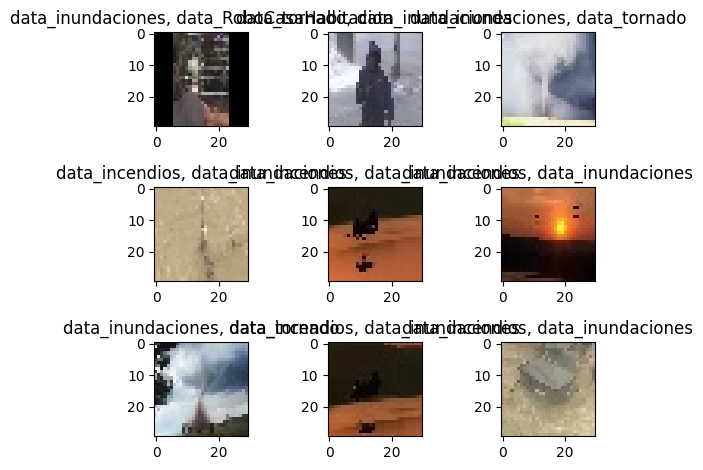

In [27]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(30,30,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(desastres[predicted_classes[incorrect]],
                                                    desastres[test_Y[incorrect]]))
    plt.tight_layout()

In [28]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.97      0.98      0.98      7806
     Class 1       0.95      0.98      0.97      2498
     Class 2       0.94      0.88      0.91      4093
     Class 3       0.97      0.97      0.97      4778
     Class 4       0.97      0.99      0.98      5319

    accuracy                           0.96     24494
   macro avg       0.96      0.96      0.96     24494
weighted avg       0.96      0.96      0.96     24494



In [37]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = [r'C:\Users\jessa\Desktop\7-5 semestre\Ultimo\CIENCIA\PROYECTO\tom_and_jerry\tom_and_jerry\modelo\test\Jerry1.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (30, 30),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = sport_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], desastres[img_tagged.tolist().index(max(img_tagged))])

InvalidArgumentError: Graph execution error:

Detected at node convolution defined at (most recent call last):
<stack traces unavailable>
Depth of input must be a multiple of depth of filter: 4 vs 3

Stack trace for op definition: 
File "<frozen runpy>", line 198, in _run_module_as_main
File "<frozen runpy>", line 88, in _run_code
File "C:\Users\jessa\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
File "C:\Users\jessa\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
File "C:\Users\jessa\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
File "C:\Users\jessa\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 205, in start
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
File "C:\Users\jessa\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
File "C:\Users\jessa\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 534, in process_one
File "C:\Users\jessa\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
File "C:\Users\jessa\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
File "C:\Users\jessa\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
File "C:\Users\jessa\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
File "C:\Users\jessa\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
File "C:\Users\jessa\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
File "C:\Users\jessa\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
File "C:\Users\jessa\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
File "C:\Users\jessa\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
File "C:\Users\jessa\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
File "C:\Users\jessa\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
File "C:\Users\jessa\AppData\Local\Temp\ipykernel_21820\340241947.py", line 16, in <module>
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 504, in predict
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 204, in one_step_on_data_distributed
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 194, in one_step_on_data
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 92, in predict_step
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\layer.py", line 846, in __call__
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\ops\operation.py", line 48, in __call__
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\sequential.py", line 209, in call
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py", line 202, in call
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\ops\function.py", line 155, in _run_through_graph
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py", line 592, in call
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\layer.py", line 846, in __call__
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\ops\operation.py", line 48, in __call__
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 243, in call
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 233, in convolution_op
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\ops\nn.py", line 909, in conv
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 254, in conv
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 244, in _conv_xla
File "c:\Users\jessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 231, in _conv

	 [[{{node convolution}}]]
	tf2xla conversion failed while converting __inference__conv_xla_7001[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[sequential_1/conv2d_1/StatefulPartitionedCall]] [Op:__inference_one_step_on_data_distributed_7029]